In [1]:
import shutil
from os import walk
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.utils.data import DataLoader

import sys; sys.path.insert(0, "../../")
from src.data.collage_mnist import CollageMNIST

## 1) preprocess collage mnist data

In [2]:
PATH = "/home/metod/datasets/collage_mnist"
DATASETS = ["train-all", "val-all"]

i = 0
labels_df = []
for j in range(len(DATASETS)):
    print(j)
    for label in [0, 1]:
        for img_path in glob.glob(f"{PATH}/{DATASETS[j]}/{label}/*.png"):
            shutil.move(img_path, f'{PATH}/train/{i}.png')
            labels_df.append((f"{i}.png", label, "train"))
            i += 1
labels_df = pd.DataFrame(labels_df)
labels_df.to_csv(f"{PATH}/train/labels.csv", index=False, header=False)


0
1


In [3]:
PATH = "/home/metod/datasets/collage_mnist"
TEST_DATASETS = ["test-fashion", "test-mnist", "test-svhn", "test-cifar"]

i = 0
labels_df = []
for j, dataset in enumerate(TEST_DATASETS):
    print(j)
    
    for label in [0, 1]:
        for img_path in glob.glob(f"{PATH}/{dataset}/{label}/*.png"):
            shutil.move(img_path, f'{PATH}/test/{i}.png')
            labels_df.append((f"{i}.png", label, dataset))
            i += 1
labels_df = pd.DataFrame(labels_df)
labels_df.to_csv(f"{PATH}/test/labels.csv", index=False, header=False)

0
1
2
3


## 2) visualize collage mnist

In [2]:
train_dataset = CollageMNIST(train=True)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [3]:
len(train_dataset)

61439

In [4]:
train_images = np.stack([x for x, _ in train_dataset], axis=0)
print(train_images.shape)

(61439, 16, 16)


In [5]:
train_images.mean()

0.33694160250690275

In [6]:
train_images.std()

0.3227605258925304

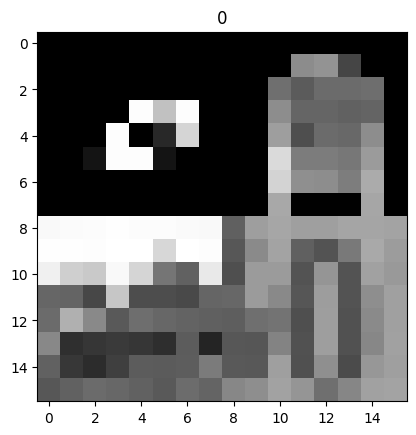

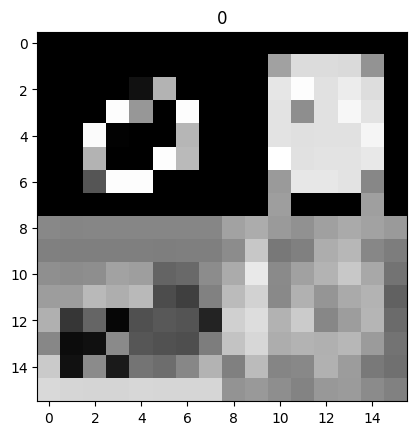

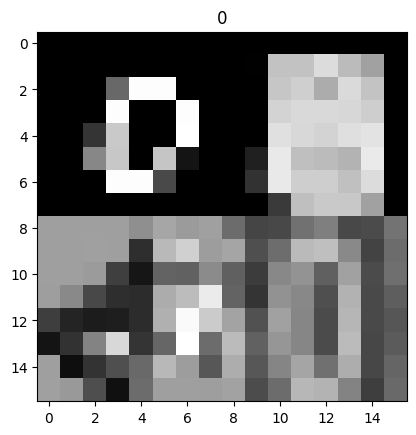

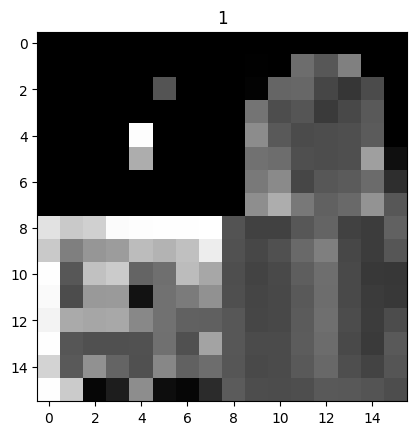

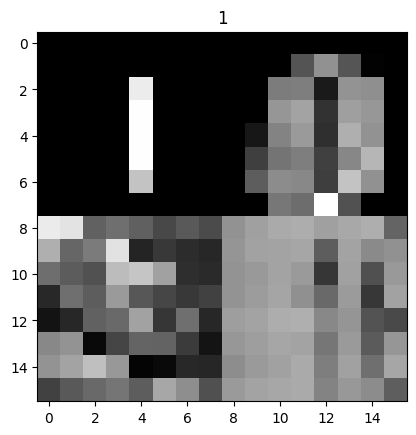

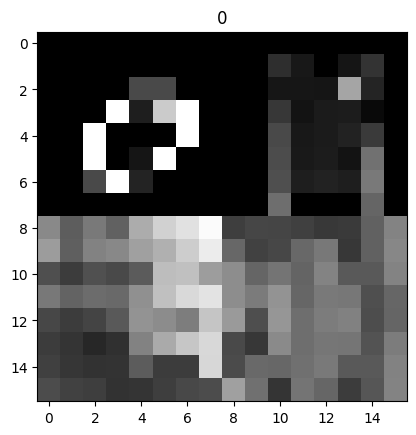

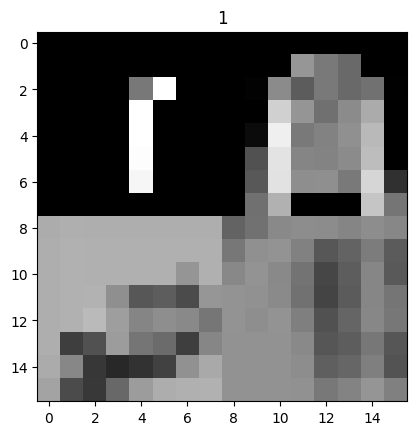

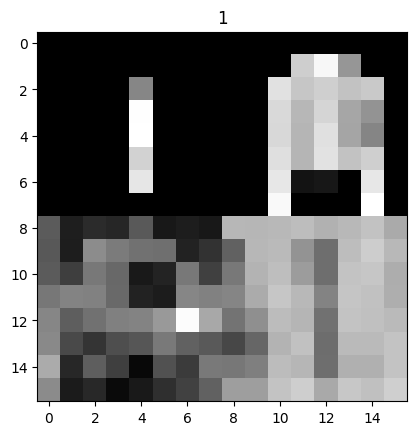

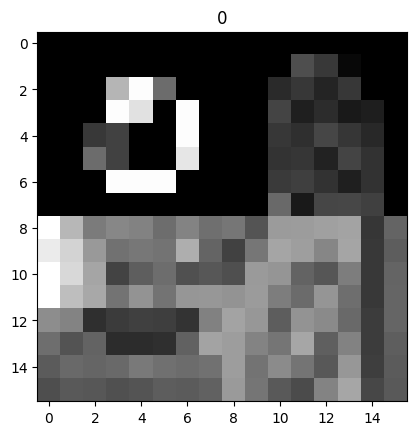

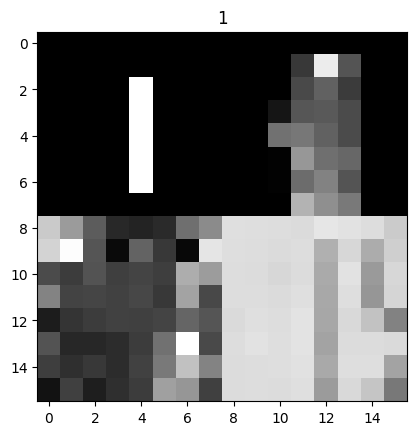

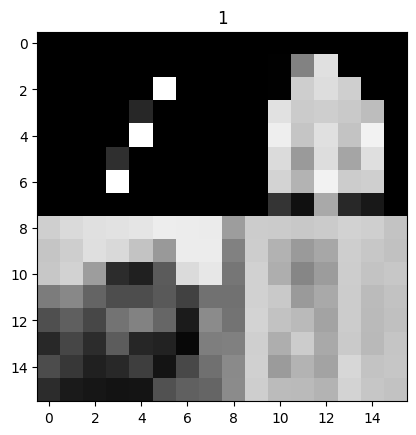

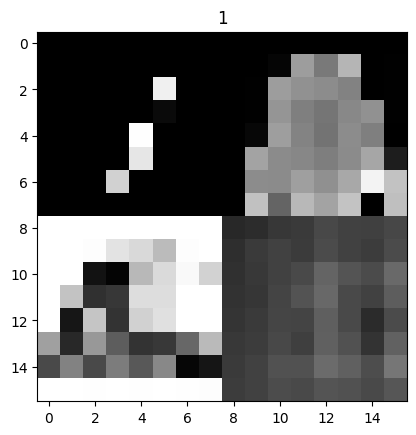

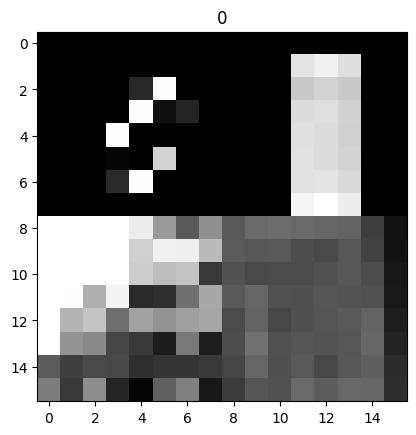

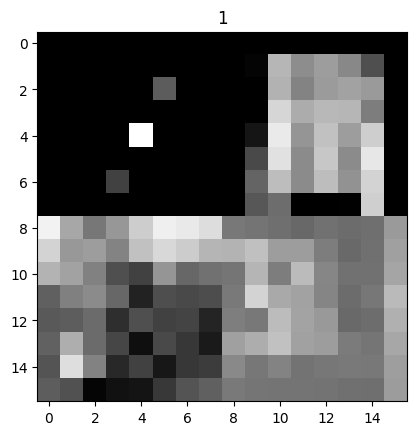

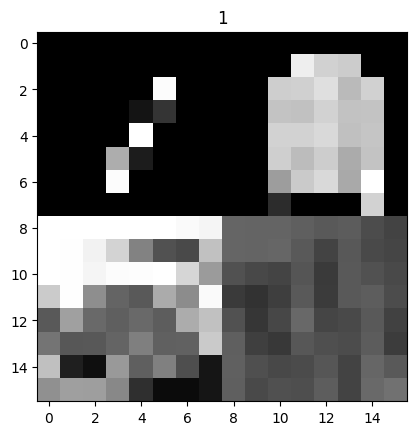

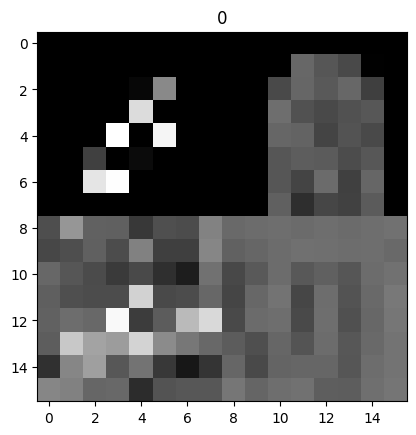

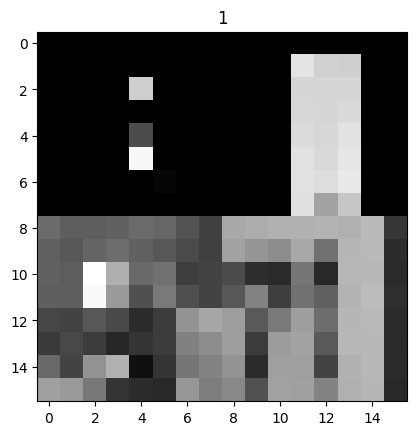

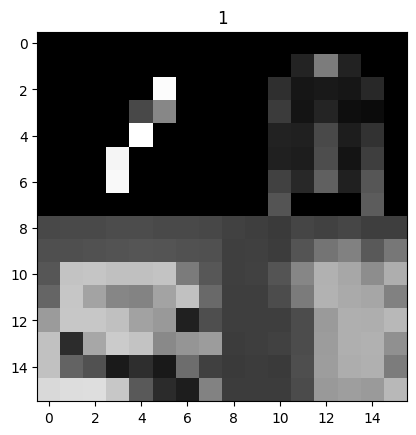

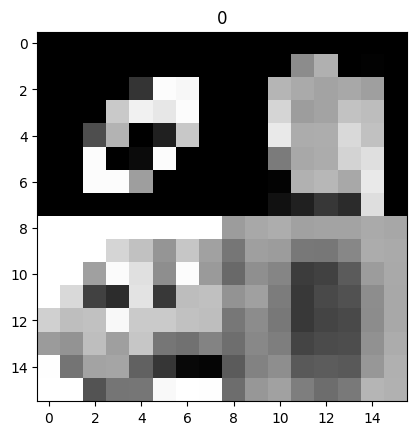

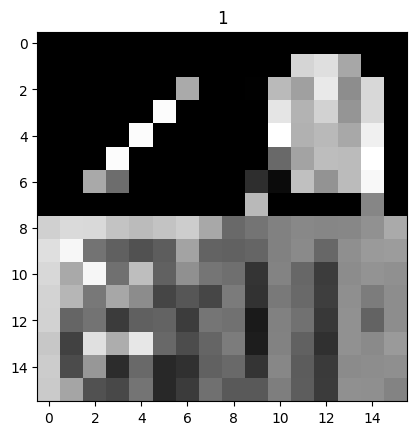

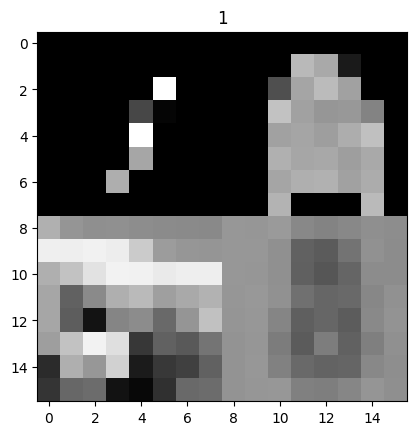

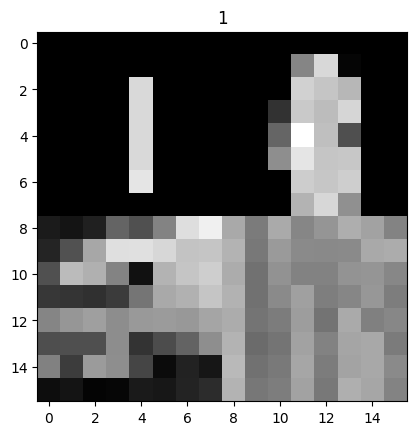

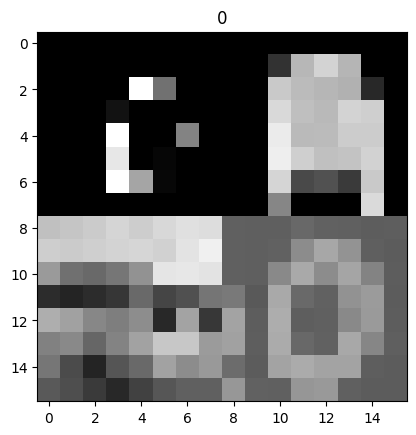

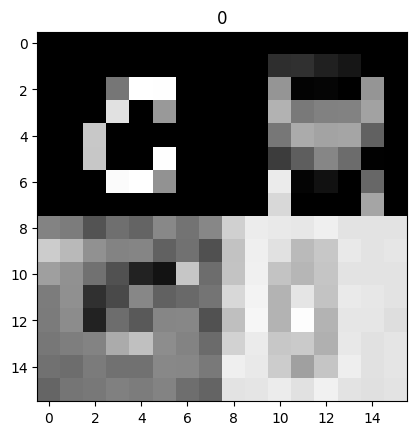

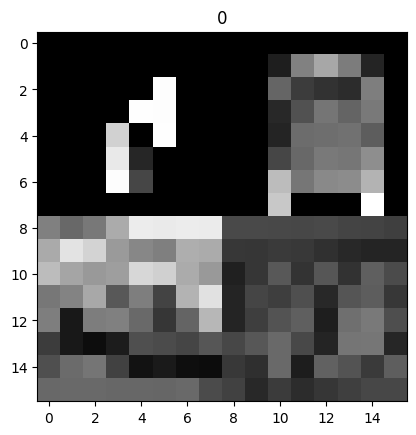

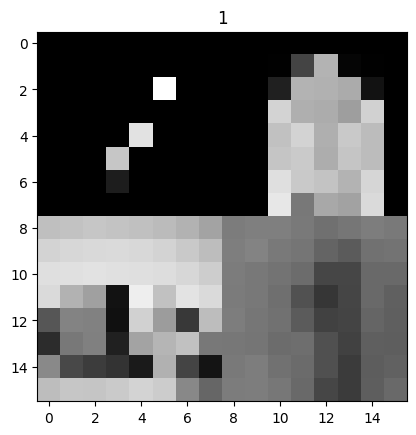

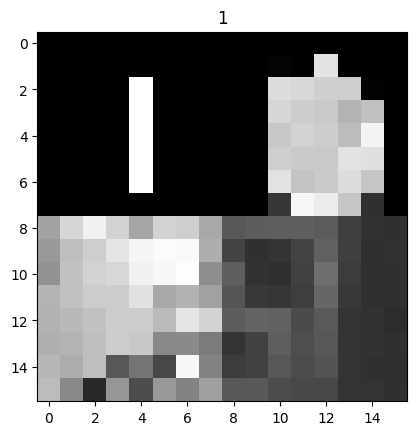

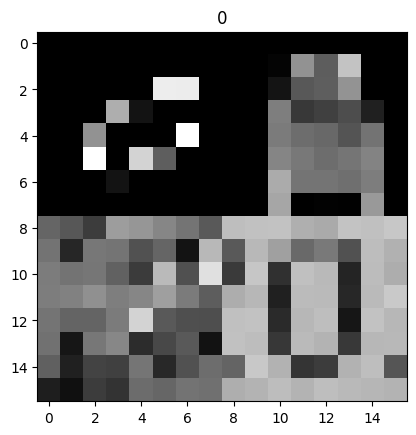

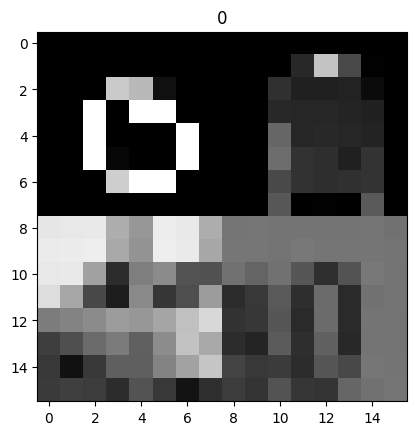

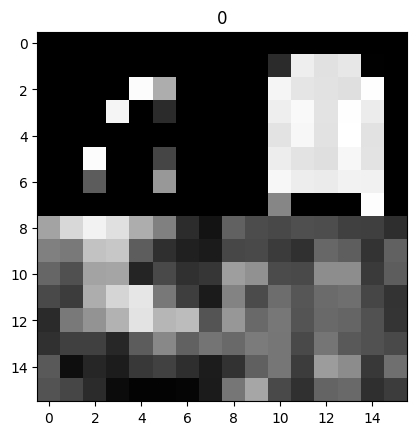

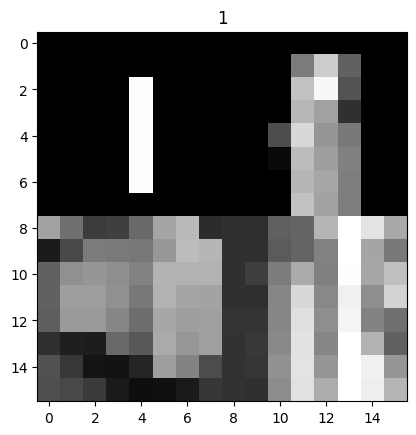

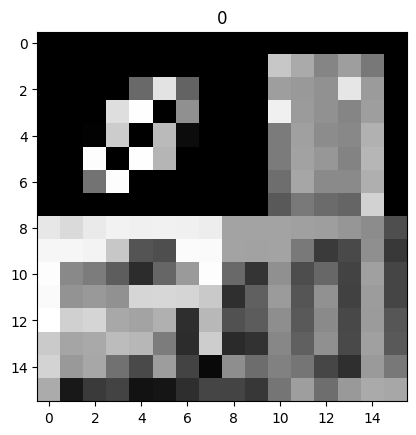

In [7]:
for x, y in train_dataloader:
    for b in range(x.shape[0]):
        plt.imshow(x[b], cmap='gray')
        plt.title(int(y[b]))
        plt.show()
    break